In [20]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [21]:
Q0 =fits.open('AS1T03_clean_Q0.lc')
Q1 =fits.open('AS1T03_clean_Q1.lc')
Q2 =fits.open('AS1T03_clean_Q2.lc')
Q3 =fits.open('AS1T03_clean_Q3.lc')
Q0[1].data

FITS_rec([(3.37196314e+08, 128.8156 , 11.349696, 0.95485336),
          (3.37196316e+08, 159.09442, 12.613264, 0.96169305),
          (3.37196316e+08, 142.84596, 11.951818, 0.9520745 ), ...,
          (3.37203880e+08, 131.37634, 11.461952, 0.9666885 ),
          (3.37203882e+08, 110.76082, 10.524297, 0.9660456 ),
          (3.37203882e+08, 142.08311, 11.919862, 0.97830063)],
         dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4')]))

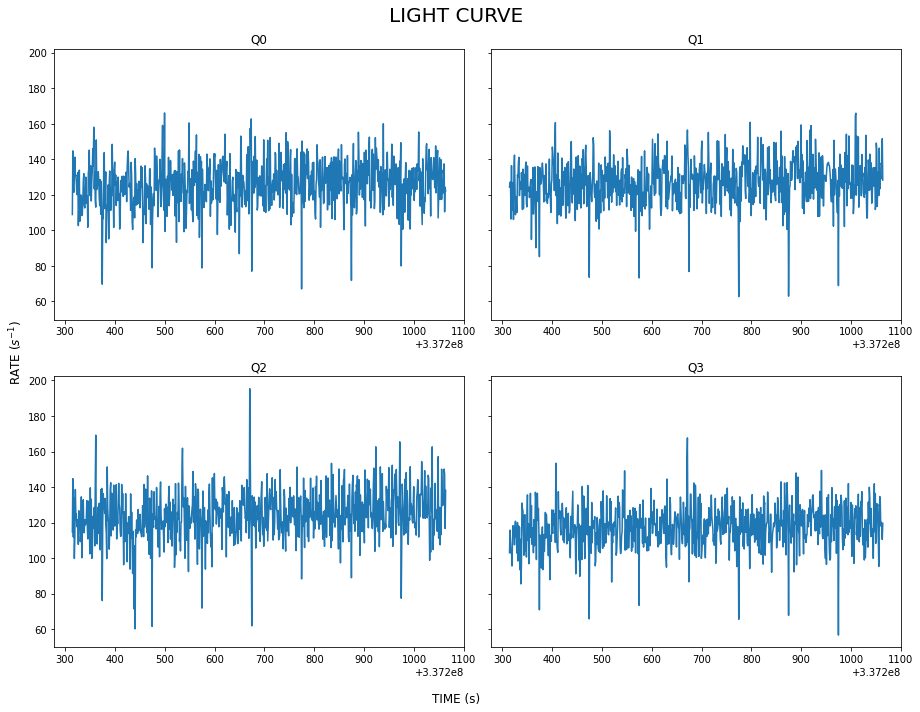

In [36]:
figure, axis = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

figure.suptitle('LIGHT CURVE',fontsize=20)
axis[0, 0].plot(Q0[1].data['TIME'][4000:4750], Q0[1].data['RATE'][4000:4750])
axis[0, 0].set_title("Q0")

axis[0, 1].plot(Q1[1].data['TIME'][4000:4750], Q1[1].data['RATE'][4000:4750])
axis[0, 1].set_title("Q1")

axis[1, 0].plot(Q2[1].data['TIME'][4000:4750], Q2[1].data['RATE'][4000:4750])
axis[1, 0].set_title("Q2")

axis[1, 1].plot(Q3[1].data['TIME'][4000:4750], Q3[1].data['RATE'][4000:4750])
axis[1, 1].set_title("Q3")

figure.supxlabel('TIME (s)')
figure.supylabel('RATE ($s^{-1}$)')
plt.tight_layout()
#plt.savefig("Plot_after_preprocess.jpg")

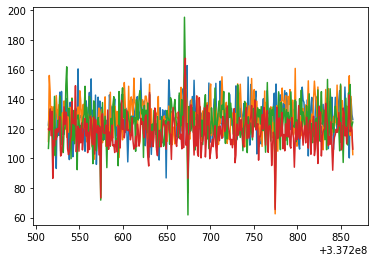

In [30]:
plt.plot(Q0[1].data['TIME'][4200:4550], Q0[1].data['RATE'][4200:4550])
plt.plot(Q1[1].data['TIME'][4200:4550], Q1[1].data['RATE'][4200:4550])
plt.plot(Q2[1].data['TIME'][4200:4550], Q2[1].data['RATE'][4200:4550])
plt.plot(Q3[1].data['TIME'][4200:4550], Q3[1].data['RATE'][4200:4550])
pl

In [33]:
Q0_time = Q0[1].data['TIME'][4200:4550]
Q0_rate = Q0[1].data['RATE'][4200:4550]

Q1_time = Q1[1].data['TIME'][4200:4550]
Q1_rate = Q1[1].data['RATE'][4200:4550]

Q2_time = Q2[1].data['TIME'][4200:4550]
Q2_rate = Q2[1].data['RATE'][4200:4550]

Q3_time = Q3[1].data['TIME'][4200:4550]
Q3_rate = Q3[1].data['RATE'][4200:4550]

### Plot Funciton

In [30]:
def plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data):
    figure, axis = plt.subplots(4, 2, figsize=(15, 15))
    figure.suptitle('DETRENDING WITH SAVGOL FILTER',fontsize=20)
    axis[0, 0].plot(Q0_time, Q0_rate, label = 'Light Curve')
    axis[0, 0].plot(Q0_time, Q0_trend, label = 'Trend')
    axis[0, 0].legend(loc='best')
    axis[0, 0].set_title("Q0")
    axis[0, 1].plot(Q0_time, Q0_detrend_data, label = 'Detrended Curve')
    axis[0, 1].legend(loc='best')
    axis[0, 1].set_title("Q0_detrended")

    axis[1, 0].plot(Q1_time, Q1_rate, label = 'Light Curve')
    axis[1, 0].plot(Q1_time, Q1_trend, label = 'Trend')
    axis[1, 0].legend(loc='best')
    axis[1, 0].set_title("Q0")
    axis[1, 1].plot(Q1_time, Q1_detrend_data, label = 'Detrended Curve')
    axis[1, 1].legend(loc='best')
    axis[1, 1].set_title("Q1_detrended")

    axis[2, 0].plot(Q2_time, Q2_rate, label = 'Light Curve')
    axis[2, 0].plot(Q2_time, Q2_trend, label = 'Trend')
    axis[2, 0].legend(loc='best')
    axis[2, 0].set_title("Q0")
    axis[2, 1].plot(Q2_time, Q2_detrend_data, label = 'Detrended Curve')
    axis[2, 1].legend(loc='best')
    axis[2, 1].set_title("Q2_detrended")

    axis[3, 0].plot(Q3_time, Q3_rate, label = 'Light Curve')
    axis[3, 0].plot(Q3_time, Q3_trend, label = 'Trend')
    axis[3, 0].legend(loc='best')
    axis[3, 0].set_title("Q0")
    axis[3, 1].plot(Q3_time, Q3_detrend_data, label = 'Detrended Curve')
    axis[3, 1].legend(loc='best')
    axis[3, 1].set_title("Q3_detrended")
    plt.savefig("Detrend curve with SAVGOL filter.jpg")
    plt.tight_layout()

### SNR (S-B)/std function

In [5]:
def SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):    
    
    print('(S-B)/std SNR')
    Q0_rate_max_ind = np.argmax(Q0_detrend_data)
    Q0_noise = np.concatenate((Q0_detrend_data[:Q0_rate_max_ind-300],Q0_detrend_data[Q0_rate_max_ind+300:]))
    Q0_mean , Q0_std = np.mean(Q0_noise) , np.std(Q0_noise)
    Q0_SNR = (max(Q0_detrend_data)-Q0_mean)/Q0_std
    print('Q0 SNR = ',Q0_SNR)

    Q1_rate_max_ind = np.argmax(Q1_detrend_data)
    Q1_noise = np.concatenate((Q1_detrend_data[:Q1_rate_max_ind-300],Q1_detrend_data[Q1_rate_max_ind+300:]))
    Q1_mean , Q1_std = np.mean(Q1_noise) , np.std(Q1_noise)
    Q1_SNR = (max(Q1_detrend_data)-Q1_mean)/Q1_std
    print('Q1 SNR = ',Q1_SNR)

    Q2_rate_max_ind = np.argmax(Q2_detrend_data)
    Q2_noise = np.concatenate((Q2_detrend_data[:Q2_rate_max_ind-300],Q2_detrend_data[Q2_rate_max_ind+300:]))
    Q2_mean , Q2_std = np.mean(Q2_noise) , np.std(Q2_noise)
    Q2_SNR = (max(Q2_detrend_data)-Q2_mean)/Q2_std
    print('Q2 SNR = ',Q2_SNR)

    Q3_rate_max_ind = np.argmax(Q3_detrend_data)
    Q3_noise = np.concatenate((Q3_detrend_data[:Q3_rate_max_ind-300],Q3_detrend_data[Q3_rate_max_ind+300:]))
    Q3_mean , Q3_std = np.mean(Q3_noise) , np.std(Q3_noise)
    Q3_SNR = (max(Q3_detrend_data)-Q3_mean)/Q3_std
    print('Q3 SNR = ',Q3_SNR)

### Noise extraction Fucntions

In [6]:
def get_noise_with_mean(rate):
    SA_w_start, SA_w_end = np.where(rate==0)[0][0], np.where(rate==0)[0][-1]
    rate_max_ind = np.argmax(Q3_rate)
    GRB_start, GRB_end = rate_max_ind-300, rate_max_ind+300
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:SA_w_start], rate[SA_w_end:]])
    noise_mean= np.mean(noise)
    noise = np.concatenate([rate[:GRB_start], [noise_mean]*(GRB_end-GRB_start),
                              rate[GRB_end:SA_w_start], [0]*(SA_w_end-SA_w_start),rate[SA_w_end:]])
    return noise

def get_noise(rate):
    SA_w_start, SA_w_end = np.where(rate==0)[0][0], np.where(rate==0)[0][-1]
    rate_max_ind = np.argmax(Q3_rate)
    GRB_start, GRB_end = rate_max_ind-300, rate_max_ind+300
    noise = np.concatenate([rate[:GRB_start], rate[GRB_end:SA_w_start], rate[SA_w_end:]])
    return noise


### Mean Filter

In [18]:
def mean_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_mfilter = [0]*len(Q0_noise)
    windows_size=80
    for i in range(0,len(Q0_noise),windows_size):
        Q0_mfilter[i:i+windows_size] = [np.mean(Q0_noise[i:i+windows_size])]*windows_size
    Q0_trend=Q0_mfilter[:7569]
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_mfilter = [0]*len(Q1_noise)
    for i in range(0,len(Q1_noise),windows_size):
        Q1_mfilter[i:i+windows_size] = [np.mean(Q1_noise[i:i+windows_size])]*windows_size
    Q1_trend=Q1_mfilter[:7240]
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_mfilter = [0]*len(Q2_noise)
    for i in range(0,len(Q2_noise),windows_size):
        Q2_mfilter[i:i+windows_size] = [np.mean(Q2_noise[i:i+windows_size])]*windows_size
    Q2_trend=Q2_mfilter[:7240]
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_mfilter = [0]*len(Q3_noise)
    for i in range(0,len(Q3_noise),windows_size):
        Q3_mfilter[i:i+windows_size] = [np.mean(Q3_noise[i:i+windows_size])]*windows_size
    Q3_trend=Q3_mfilter[:7240]
    Q3_detrend_data = Q3_rate-Q3_trend

    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Median Filter

In [8]:
def median_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_mfilter = [0]*len(Q0_noise)
    windows_size=80
    for i in range(0,len(Q0_noise),windows_size):
        Q0_mfilter[i:i+windows_size] = [np.median(Q0_noise[i:i+windows_size])]*windows_size
    Q0_trend=Q0_mfilter[:7240]
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_mfilter = [0]*len(Q1_noise)
    for i in range(0,len(Q1_noise),windows_size):
        Q1_mfilter[i:i+windows_size] = [np.median(Q1_noise[i:i+windows_size])]*windows_size
    Q1_trend=Q1_mfilter[:7240]
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_mfilter = [0]*len(Q2_noise)
    for i in range(0,len(Q2_noise),windows_size):
        Q2_mfilter[i:i+windows_size] = [np.median(Q2_noise[i:i+windows_size])]*windows_size
    Q2_trend=Q2_mfilter[:7240]
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_mfilter = [0]*len(Q3_noise)
    for i in range(0,len(Q3_noise),windows_size):
        Q3_mfilter[i:i+windows_size] = [np.median(Q3_noise[i:i+windows_size])]*windows_size
    Q3_trend=Q3_mfilter[:7240]
    Q3_detrend_data = Q3_rate-Q3_trend

    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Savgol Filter

In [9]:
def savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    print('SAVGOL FILTER')
    window_length = 100
    polyorder=2

    Q0_noise = get_noise_with_mean(Q0_rate)
    Q0_trend = signal.savgol_filter(Q0_noise , window_length, polyorder)
    Q0_detrend_data = Q0_rate-Q0_trend

    Q1_noise = get_noise_with_mean(Q1_rate)
    Q1_trend = signal.savgol_filter(Q1_noise , window_length, polyorder)
    Q1_detrend_data = Q1_rate-Q1_trend

    Q2_noise = get_noise_with_mean(Q2_rate)
    Q2_trend = signal.savgol_filter(Q2_noise , window_length, polyorder)
    Q2_detrend_data = Q2_rate-Q2_trend

    Q3_noise = get_noise_with_mean(Q3_rate)
    Q3_trend = signal.savgol_filter(Q3_noise , window_length, polyorder)
    Q3_detrend_data = Q3_rate-Q3_trend
    
    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

### Gausian SNR

In [10]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('GAUSSIAN SNR')
    Q0_noise = get_noise(Q0_detrend_data)
    n, bins = np.histogram(Q0_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q0 SNR = ',abs((max(Q0_detrend_data))/(popt[1]+3*popt[2])))
    
    Q1_noise = get_noise(Q1_detrend_data)
    n, bins = np.histogram(Q1_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q1 SNR = ',abs((max(Q1_detrend_data))/(popt[1]+3*popt[2])))
    
    Q2_noise = get_noise(Q3_detrend_data)
    n, bins = np.histogram(Q2_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q2 SNR = ',abs((max(Q2_detrend_data))/(popt[1]+3*popt[2])))
    
    Q3_noise = get_noise(Q3_detrend_data)
    n, bins = np.histogram(Q3_noise, bins=80)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(gauss_func,bin_centers,n)
    print('Q3 SNR = ',abs((max(Q3_detrend_data))/(popt[1]+3*popt[2])))

In [34]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
#SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER


IndexError: index 0 is out of bounds for axis 0 with size 0

In [12]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER


ValueError: operands could not be broadcast together with shapes (7569,) (14029,) 

### Poisson SNR

In [13]:
def poisson_func(x, x0):
    return poisson.pmf(x,x0)

def Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):   
    
    print('Poisson SNR')
    Q0_noise = get_noise(Q0_detrend_data)
    Q0_noise_off = Q0_noise+100
    n, bins = np.histogram(Q0_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q0 SNR = ',((max(Q0_noise))/(popt[0]+3*h))*100)
    
    Q1_noise = get_noise(Q1_detrend_data)
    Q1_noise_off = Q1_noise+100
    n, bins = np.histogram(Q1_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q1_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q1 SNR = ',((max(Q1_noise))/(popt[0]+3*h))*100)
    
    Q2_noise = get_noise(Q2_detrend_data)
    Q2_noise_off = Q2_noise+100
    n, bins = np.histogram(Q2_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q2_noise_off)])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q2 SNR = ',((max(Q2_noise))/(popt[0]+3*h))*100)
    
    Q3_noise = get_noise(Q3_detrend_data)
    Q3_noise_off = Q3_noise+100
    n, bins = np.histogram(Q3_noise_off, bins=80,density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    xplot = np.arange(36,175)
    h=np.std(poisson_func(xplot,popt[0]))
    print('Q3 SNR = ',((max(Q3_noise))/(popt[0]+3*h))*100)

In [32]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
#Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER


ValueError: operands could not be broadcast together with shapes (7569,) (14029,) 

SAVGOL FILTER


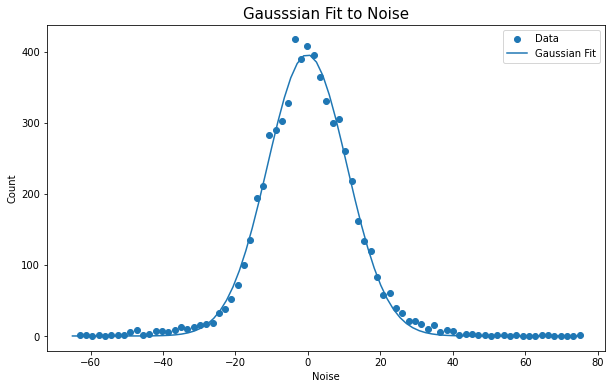

In [60]:
def gauss_func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
Q0_noise = get_noise(Q0_detrend_data)
n, bins = np.histogram(Q0_noise, bins=80)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(gauss_func,bin_centers,n)
xplot = np.linspace(-65,75,len(bin_centers))
plt.figure(figsize=(10,6))
plt.title('Gausssian Fit to Noise',fontsize=15)
plt.scatter(bin_centers,n,label='Data')
plt.plot(xplot,gauss_func(xplot,popt[0],popt[1],popt[2]),label='Gaussian Fit')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
plt.savefig('Gausssian Fit.jpeg')

99.99725839796491


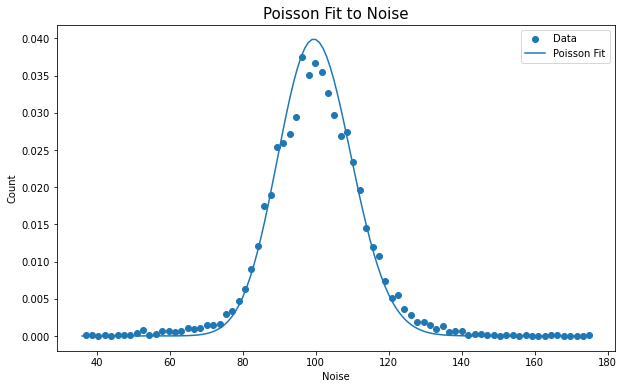

In [61]:
def poisson_func(x, x0):
    return poisson.pmf(x,x0)

Q0_noise = get_noise(Q0_detrend_data)
Q0_noise_off = Q0_noise+100
n, bins = np.histogram(Q0_noise_off, bins=80,density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
popt, pcov = curve_fit(poisson_func,bin_centers,n,p0=[np.mean(Q0_noise_off)])
print(popt[0])
xplot = np.arange(36,175)
plt.figure(figsize=(10,6))
plt.title('Poisson Fit to Noise',fontsize=15)
plt.scatter(bin_centers,n,label='Data')
plt.plot(xplot,poisson_func(xplot,popt[0]),label='Poisson Fit')
plt.xlabel('Noise')
plt.ylabel('Count')
plt.legend(loc='best')
plt.savefig('Poisson Fit')

In [86]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'N')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Gausian_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)
Poisson_SNR(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)

SAVGOL FILTER
(S-B)/std SNR
Q0 SNR =  48.939330981635514
Q1 SNR =  49.81072299368719
Q2 SNR =  50.50556748600604
Q3 SNR =  46.56079702684067
GAUSSIAN SNR
Q0 SNR =  18.170517200432492
Q1 SNR =  18.209337468083522
Q2 SNR =  19.045051472208044
Q3 SNR =  17.441357949152682
Poisson SNR
Q0 SNR =  75.80536897845296
Q1 SNR =  72.92215481774143
Q2 SNR =  83.09208504051423
Q3 SNR =  69.14155302191
